Coded by *Juan Peiró Esteban*, data consultant and Pokémon enthusiast.

# Importing libraries and defining functions

In [1]:
#General operative sistem aspects.
import os
#General manipulating data.
import pandas as pd
#Using regular expressions.
import re
#Setting a classification tree model.
from sklearn.tree import DecisionTreeClassifier as DTC
#Hyperparameter tunning.
from sklearn.model_selection import GridSearchCV as GSCV
#Displaying classification trees learned.
from sklearn.tree import plot_tree
#Obtaining confusion matrix.
from sklearn.metrics import confusion_matrix
#Displaying graphics.
from matplotlib import pyplot as plt
#Displaying heat maps.
import seaborn as sns

In [2]:
#Displaying heat map for provided confusion matrix.
def plot_cm(cm, labels):
    #To display figure on screen.
    plt.figure()
    #Defining figure.
    ax = plt.subplot()
    #Plotting heat map from provided confusion matrix.
    sns.heatmap(cm, annot = True, ax = ax, fmt = 'g', cmap = 'Greens')
    #Setting labels on axis for true and predicted labels.
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels') 
    #Setting graphic title.
    ax.set_title('Confusion Matrix')
    #Setting labels on designed order.
    ax.xaxis.set_ticklabels(labels) 
    ax.yaxis.set_ticklabels(labels)
    #Showing on screen.
    plt.show()

# Data reading

In [3]:
#Defining root folder.
root = os.getcwd()
#Reading Pokémon data from "pokemon.csv" file in root folder.
pokemon_all_gen = pd.read_csv(root + "/pokemon.csv")

In [4]:
#Displaying first entries in our database.
pokemon_all_gen.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# Variable featuring

In [5]:
#With a little knowledge on Pokémon universe we can note the absence of any flag to refer to Mega, Primal and Ultra forms.
[name for name in pokemon_all_gen['Name'] if ('Mega' in name) | ('Primal' in name) | ('Ultra' in name)]

['VenusaurMega Venusaur',
 'CharizardMega Charizard X',
 'CharizardMega Charizard Y',
 'BlastoiseMega Blastoise',
 'BeedrillMega Beedrill',
 'PidgeotMega Pidgeot',
 'AlakazamMega Alakazam',
 'SlowbroMega Slowbro',
 'GengarMega Gengar',
 'KangaskhanMega Kangaskhan',
 'PinsirMega Pinsir',
 'GyaradosMega Gyarados',
 'AerodactylMega Aerodactyl',
 'MewtwoMega Mewtwo X',
 'MewtwoMega Mewtwo Y',
 'Meganium',
 'AmpharosMega Ampharos',
 'SteelixMega Steelix',
 'ScizorMega Scizor',
 'HeracrossMega Heracross',
 'HoundoomMega Houndoom',
 'TyranitarMega Tyranitar',
 'SceptileMega Sceptile',
 'BlazikenMega Blaziken',
 'SwampertMega Swampert',
 'GardevoirMega Gardevoir',
 'SableyeMega Sableye',
 'MawileMega Mawile',
 'AggronMega Aggron',
 'MedichamMega Medicham',
 'ManectricMega Manectric',
 'SharpedoMega Sharpedo',
 'CameruptMega Camerupt',
 'AltariaMega Altaria',
 'BanetteMega Banette',
 'AbsolMega Absol',
 'GlalieMega Glalie',
 'SalamenceMega Salamence',
 'MetagrossMega Metagross',
 'LatiasMega La

In [6]:
#We have information from 1st generation to 6th, so we will only have Mega and Primal forms. Anyway, the code will be ready
#to assign this special form flag to any Mega, Primal or Ultra forms. We will use regular expressions to find for "Mega",
#"Primal" and "Ultra" among Pokémon names.
pokemon_all_gen['Special Form'] = pokemon_all_gen['Name'].apply(lambda x: bool(re.search('(.)+(Mega|Primal|Ultra)(.)+', x)))
#Meganium was the only exception found before, and this regular expression excludes the name for that Pokémon.

In [7]:
#Screen checking.
pokemon_all_gen.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Special Form
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,False


# Building tree classifier model

In [8]:
#We will try to predict if a Pokémon is a legendary or not. Legendary Pokémons tend to have high total stats. However, Pokémon 
#in "Special Forms" ("Mega", "Primal", "Ultra") also tend to have higher stats than average. To further complicate our problem,
#Legendary Pokémons can also have "Special Forms", providing them with even higher stats. With that said, we will choose 
#"Legendary" as our target, and "Total" (total stats) and "Special Form" as features to predict target.
features = ['Total', 'Special Form']
X = pokemon_all_gen[features]
target = 'Legendary'
y = pokemon_all_gen[target]

[Text(159.42857142857142, 489.24, 'Total <= 579.5\ngini = 0.17\nsamples = 800\nvalue = [725, 75]\nclass = Not Leg.'),
 Text(79.71428571428571, 380.52000000000004, 'gini = 0.003\nsamples = 687\nvalue = [686, 1]\nclass = Not Leg.'),
 Text(239.1428571428571, 380.52000000000004, 'Special Form <= 0.5\ngini = 0.452\nsamples = 113\nvalue = [39, 74]\nclass = Legendary'),
 Text(159.42857142857142, 271.8, 'gini = 0.193\nsamples = 74\nvalue = [8, 66]\nclass = Legendary'),
 Text(318.85714285714283, 271.8, 'Total <= 670.0\ngini = 0.326\nsamples = 39\nvalue = [31, 8]\nclass = Not Leg.'),
 Text(239.1428571428571, 163.08000000000004, 'gini = 0.0\nsamples = 27\nvalue = [27, 0]\nclass = Not Leg.'),
 Text(398.57142857142856, 163.08000000000004, 'Total <= 735.0\ngini = 0.444\nsamples = 12\nvalue = [4, 8]\nclass = Legendary'),
 Text(318.85714285714283, 54.360000000000014, 'gini = 0.49\nsamples = 7\nvalue = [4, 3]\nclass = Not Leg.'),
 Text(478.2857142857142, 54.360000000000014, 'gini = 0.0\nsamples = 5\nva

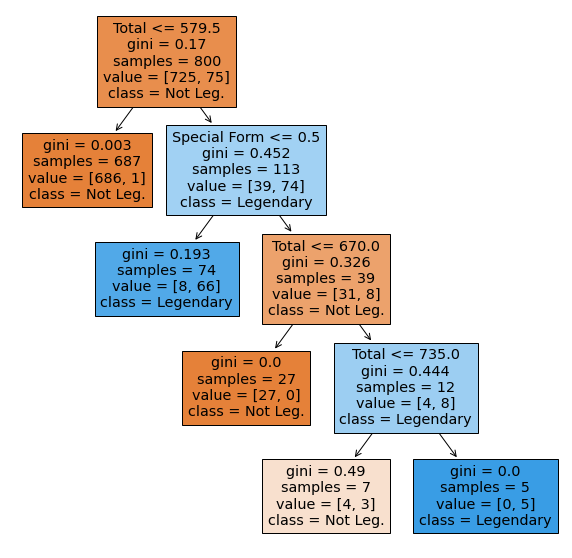

In [9]:
#Building tree model with indeterminate number of splits. We will use hyperparameter searching.
model = GSCV(DTC(min_impurity_decrease = 1e-3), {'max_depth': range(1, 11, 1)}, cv = 5)
#In this toy example we won't split data into train and test, as the number of Pokémon is 'midly' limited.
model.fit(X, y)
#Let's predict 'Legendary' labels with trained tree.
y_pred = model.predict(X)
#Obtaining ordered labels as a set comprehension and later a list comprehension. We will later transform booleans into text.
ordered_classes = model.classes_
ordered_labels = [*map(lambda x: "Legendary" if x else "Not Leg.", ordered_classes)]
#By last, let's visually plot our best trained tree.
plt.figure(figsize = (10, 10))
plot_tree(model.best_estimator_, feature_names = features, class_names = ordered_labels, filled = True)

# Results analysis

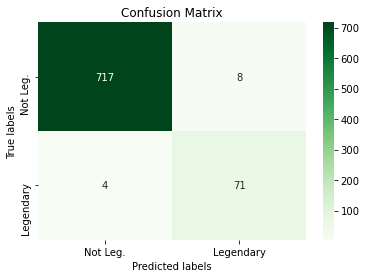

In [10]:
#Obtaining confusion matrix with labels ordered as previously said.
cm = confusion_matrix(y, y_pred, labels = ordered_classes)
#Printing obtained confusion matrix with labels ordered as previously said.
plot_cm(cm, ordered_labels)

In [11]:
#Let's analyze missclassified Pokémons.
pokemon_all_gen.loc[y != y_pred, ['Name', 'Total', 'Special Form', 'Legendary']]

,Name,Total,Special Form,Legendary
161,Dragonite,600,False,False
267,Tyranitar,600,False,False
313,Slaking,670,False,False
408,Salamence,600,False,False
412,Metagross,600,False,False
418,LatiasMega Latias,700,True,True
420,LatiosMega Latios,700,True,True
493,Garchomp,600,False,False
547,Phione,480,False,True
696,Hydreigon,600,False,False


We got three main groups of missclassified Pokémon here:
+ Non-legendary Pokémon with high stats and no special form which are incorrectly predicted as legendary ones.

In [12]:
print('Avg. Total Stats for Non-Legendary No Special Form Pokémon: ' + str(round(pokemon_all_gen.loc[(~pokemon_all_gen['Special Form']) & (~pokemon_all_gen['Legendary']),'Total'].mean(), 2)))

Avg. Total Stats for Non-Legendary No Special Form Pokémon: 403.53


+ Legendary Pokémon with relatively low stats for being special form.

In [13]:
print('Avg. Total Stats for Legendary Special Form Pokémon: ' + str(round(pokemon_all_gen.loc[(pokemon_all_gen['Special Form']) & (pokemon_all_gen['Legendary']),'Total'].mean(), 2)))

Avg. Total Stats for Legendary Special Form Pokémon: 747.5


+ Phione, a legendary Pokémon with low stats even for being no special form.

In [14]:
print('Avg. Total Stats for Legendary No Special Form Pokémon: ' + str(round(pokemon_all_gen.loc[(~pokemon_all_gen['Special Form']) & (pokemon_all_gen['Legendary']),'Total'].mean(), 2)))

Avg. Total Stats for Legendary No Special Form Pokémon: 616.27


Last two groups correspond to known exceptions that don't follow any general rule. There just happen to be some weaker legendary Pokémon like Latios, Latios, Diance (in this case in their MegaEvolution forms) and Phione who don't reach such a high level of stats, so little could be done with these 4 missclassified examples.

On the other hand, names as Dragonite, Tyranitar or Salamence reminds us of some kind of Pokémon, with only 1 or 2 of them existing by generation, called "Pseudo-Legendaries", also called "Titans". For clarity reasons, we will use the later term when refering to them to avoid confusing them with real "Legendaries". A "Titan" is a non-legendary Pokémon with higher stats than average, reaching total stats close to "Legendary" ones. There are few "Titans" included in each generation, so that list will be easy to implement as a new feature in our database. Therefore, we will be able to have some flag for this "Titan" Pokémon which may avoid missclassifing them as "Legendary".

# Revisiting variable featuring

In [15]:
#Defining the list of names of "Titan" Pokémon from every generation. Remember that our database reaches to 6th generation,
#so many of the Pokémons included in this list may not appear in our database. Anyways, we will leave code like this in order
#to efectivelly response if the database is modified and new generations are added (as we did with "Special Form" featuring).
titans = ['Dragonite', 'Tyranitar', 'Salamence', 'Metagross', 'Garchomp', 'Hydreigon', 'Goodra', 'Kommo-o', 'Dragapult']
#Let's add this as a new feature in similar fashion as we did before.
pokemon_all_gen['Titan'] = pokemon_all_gen['Name'].apply(lambda x: x in titans)

In [16]:
#Screen checking.
pokemon_all_gen[pokemon_all_gen['Name'].isin(titans)].head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Special Form,Titan
161,149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,1,False,False,True
267,248,Tyranitar,Rock,Dark,600,100,134,110,95,100,61,2,False,False,True
408,373,Salamence,Dragon,Flying,600,95,135,80,110,80,100,3,False,False,True
412,376,Metagross,Steel,Psychic,600,80,135,130,95,90,70,3,False,False,True
493,445,Garchomp,Dragon,Ground,600,108,130,95,80,85,102,4,False,False,True


# Rebuilding tree classifier model

In [17]:
#We will add now the 'Titan' flag to our model.
features = ['Total', 'Special Form', 'Titan']
X = pokemon_all_gen[features]
target = 'Legendary'
y = pokemon_all_gen[target]

[Text(186.0, 489.24, 'Total <= 579.5\ngini = 0.17\nsamples = 800\nvalue = [725, 75]\nclass = Not Leg.'),
 Text(124.0, 380.52000000000004, 'gini = 0.003\nsamples = 687\nvalue = [686, 1]\nclass = Not Leg.'),
 Text(248.0, 380.52000000000004, 'Special Form <= 0.5\ngini = 0.452\nsamples = 113\nvalue = [39, 74]\nclass = Legendary'),
 Text(124.0, 271.8, 'Titan <= 0.5\ngini = 0.193\nsamples = 74\nvalue = [8, 66]\nclass = Legendary'),
 Text(62.0, 163.08000000000004, 'gini = 0.029\nsamples = 67\nvalue = [1, 66]\nclass = Legendary'),
 Text(186.0, 163.08000000000004, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = Not Leg.'),
 Text(372.0, 271.8, 'Total <= 670.0\ngini = 0.326\nsamples = 39\nvalue = [31, 8]\nclass = Not Leg.'),
 Text(310.0, 163.08000000000004, 'gini = 0.0\nsamples = 27\nvalue = [27, 0]\nclass = Not Leg.'),
 Text(434.0, 163.08000000000004, 'Total <= 735.0\ngini = 0.444\nsamples = 12\nvalue = [4, 8]\nclass = Legendary'),
 Text(372.0, 54.360000000000014, 'gini = 0.49\nsamples = 7\nva

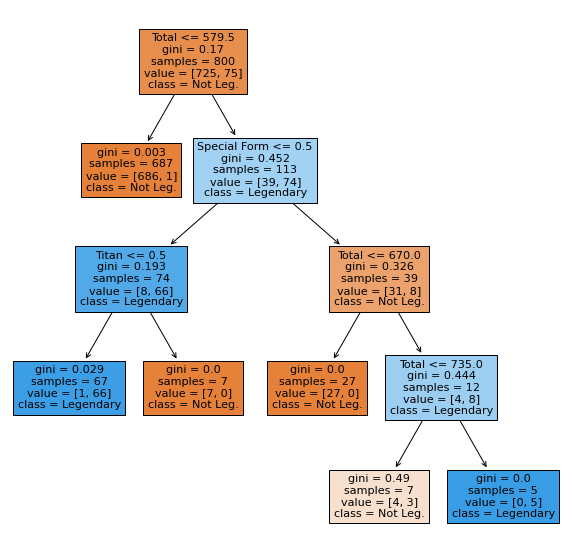

In [18]:
#Building tree model with indeterminate number of splits. We will use hyperparameter searching.
model = GSCV(DTC(min_impurity_decrease = 1e-3), {'max_depth': range(1, 11, 1)}, cv = 5)
#In this toy example we won't split data into train and test, as the number of Pokémon is 'midly' limited.
model.fit(X, y)
#Let's predict 'Legendary' labels with trained tree.
y_pred = model.predict(X)
#Obtaining ordered labels as a set comprehension and later a list comprehension. We will later transform booleans into text.
ordered_classes = model.classes_
ordered_labels = [*map(lambda x: "Legendary" if x else "Not Leg.", ordered_classes)]
#By last, let's visually plot our best trained tree.
plt.figure(figsize = (10, 10))
plot_tree(model.best_estimator_, feature_names = features, class_names = ordered_labels, filled = True)

# Revisiting results analysis

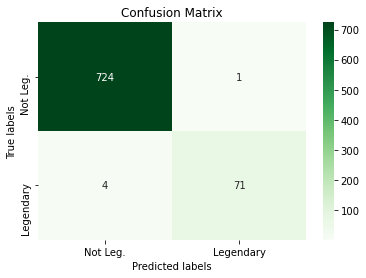

In [19]:
#Obtaining confusion matrix with labels ordered as previously said.
cm = confusion_matrix(y, y_pred, labels = ordered_classes)
#Printing obtained confusion matrix with labels ordered as previously said.
plot_cm(cm, ordered_labels)

In [20]:
#Let's analyze missclassified Pokémons.
pokemon_all_gen.loc[y != y_pred, ['Name', 'Total', 'Special Form', 'Legendary']]

,Name,Total,Special Form,Legendary
313,Slaking,670,False,False
418,LatiasMega Latias,700,True,True
420,LatiosMega Latios,700,True,True
547,Phione,480,False,True
796,DiancieMega Diancie,700,True,True


We can still observate the beforementioned 4 examples of 'weak' legendaries missclassified as non-legendaries, but as previously said this will not disturb us. Most of the rest of non-legendary Pokémon are correctly classified, which suggest an improve of the model with the addition of this new variable.

The only exception we can find is Slaking, a weird example on its own. We will not go much further here, just noting that its extremely high stats for a non-Titan and non-Legendary are compensated by some other in-combat feature of Slaking (specifically its ability 'Truant'). This explains why we are not able to correctly classify it inside our model.

# Conclusions

We observe the subtle difference between both trees. The general structure is really similar between them both, with the exception of a previous leaf, now node. Initially, we classified al 74 samples as legendary, being correct for 66 and incorrect for 8. Now, with the addition of the feature 'Titan', we can effectively split that node as two leafs, which improves the Gini impurity measure used for the tree. 7 of those 8 initially missclassified as 'Legendary' examples are now correctly classified as 'Non-Legendary'.